In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.shape

(20800, 5)

In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
#data.shape

In [8]:
data.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

In [9]:
data['label']=data['label'].astype(str)

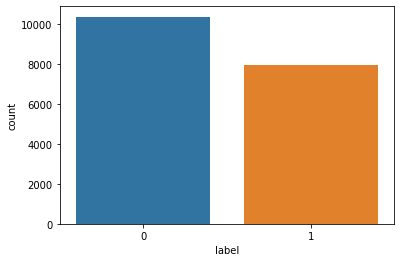

In [10]:
sns.countplot(data['label'])

In [11]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
mess=data.copy()

In [13]:
mess.reset_index(inplace=True)

In [14]:
mess.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [15]:
mess.drop(['index','id'],axis=1,inplace=True)

In [16]:
mess.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [17]:
dt=mess['title'][0]

In [18]:
import re

In [19]:
re.sub('[^a-zA-Z]',' ',dt)

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [20]:
dt=dt.lower()
dt

'house dem aide: we didn’t even see comey’s letter until jason chaffetz tweeted it'

In [21]:
list=dt.split()
list

['house',
 'dem',
 'aide:',
 'we',
 'didn’t',
 'even',
 'see',
 'comey’s',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [22]:
#!pip install nltk

In [23]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [24]:
ps=PorterStemmer()

In [25]:
review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review

['hous',
 'dem',
 'aide:',
 'didn’t',
 'even',
 'see',
 'comey’',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [26]:
" ".join(review)

'hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'

In [27]:
corpus=[]
sentences=[]
for i in range(0,len(mess)):
    review=re.sub('[^a-zA-Z]',' ', mess['title'][i])
    review=review.lower()
    list=review.split()
    review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    sentences=' '.join(review)
    corpus.append(sentences)

In [28]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [29]:
len(corpus)

18285

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [31]:
X=cv.fit_transform(corpus).toarray()

In [32]:
X.shape

(18285, 5000)

In [33]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Top 20 Fesatures

In [34]:
cv.get_feature_names()[0:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [35]:
mess.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [36]:
y=mess['label']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

In [39]:
X_test.shape

(4572, 5000)

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()

In [41]:
clf.fit(X_train,y_train)

MultinomialNB()

In [42]:
pred=clf.predict(X_test)
pred

array(['1', '0', '0', ..., '1', '0', '0'], dtype='<U1')

In [43]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(y_test,pred)

0.905511811023622

In [45]:
cm=metrics.confusion_matrix(y_test,pred)
print('confusion Matrix:\n {}'.format(cm))

confusion Matrix:
 [[2340  266]
 [ 166 1800]]


In [46]:
import matplotlib.pyplot as plt
import numpy as np

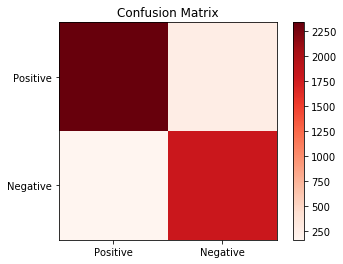

In [47]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Reds)
plt.colorbar()
plt.title('Confusion Matrix')
lables=['Positive','Negative']
tick_marks=np.arange(len(lables))
plt.xticks(tick_marks,lables)
plt.yticks(tick_marks,lables)
plt.show()

In [48]:
from sklearn.linear_model import PassiveAggressiveClassifier
pclf=PassiveAggressiveClassifier()

In [49]:
pclf.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [50]:
pred1=pclf.predict(X_test)
pred1

array(['1', '0', '0', ..., '1', '1', '0'], dtype='<U1')

In [52]:
cm2=metrics.confusion_matrix(y_test,pred1)
print('Confussion Matrix: \n {}'.format(cm2))

Confussion Matrix: 
 [[2421  185]
 [ 177 1789]]


In [53]:
metrics.accuracy_score(y_test,pred1)

0.92082239720035

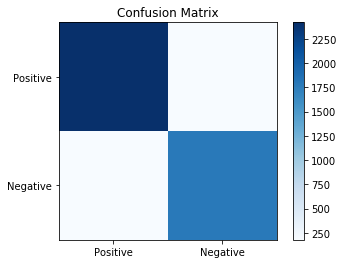

In [55]:
plt.imshow(cm2,interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
lables=['Positive','Negative']
tick_marks=np.arange(len(lables))
plt.xticks(tick_marks,lables)
plt.yticks(tick_marks,lables)
plt.show()